<a href="https://colab.research.google.com/github/Ethan-Jeong/test_deeplearning/blob/master/NLP%20/%20seq2seq.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np

In [6]:
index_inputs = np.load(open('./train_inputs.npy','rb'))
index_outputs = np.load(open('./train_outputs.npy','rb'))
index_targets = np.load(open('./train_targets.npy','rb'))
type(index_inputs) , type(index_outputs) , type(index_targets)

(numpy.ndarray, numpy.ndarray, numpy.ndarray)

In [7]:
index_inputs[3:5]

array([[ 20,  30, 107,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [ 93,   7,  79,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0]])

In [8]:
!python -m pip install konlpy

     |████████████████████████████████| 19.4 MB 1.3 MB/s 
     |████████████████████████████████| 86 kB 6.4 MB/s 
     |████████████████████████████████| 448 kB 48.8 MB/s 
  Attempting uninstall: beautifulsoup4
    Found existing installation: beautifulsoup4 4.6.3
    Uninstalling beautifulsoup4-4.6.3:
      Successfully uninstalled beautifulsoup4-4.6.3


In [10]:
import preprocess as pp 

In [12]:
prepro_configs = pp.json.load(open('./data_configs.json','r'))

In [13]:
type(prepro_configs)

dict

In [15]:
prepro_configs.keys()

dict_keys(['char2idx', 'idx2char', 'vocab_size', 'pad_symbol', 'std_symbol', 'end_symbol', 'unk_symbol'])

## make model


In [16]:
import tensorflow as tf

## encode model

In [21]:
vocab_size = prepro_configs['vocab_size']
latent_dim = 60

In [22]:
encode_input = tf.keras.Input(shape=(None,))
encode_hidden = tf.keras.layers.Embedding(input_dim=src_vocab_size, output_dim=latent_dim)(encode_input)
encode_output , state_h , state_c = tf.keras.layers.LSTM(50, return_state=True)(encode_hidden)
encode_states = [state_h, state_c]


## decode model

In [37]:
decode_input = tf.keras.Input(shape=(None,))
decode_hidden = tf.keras.layers.Embedding(input_dim=vocab_size,output_dim=latent_dim)(decode_input)
decode_lstm , _ , _ = tf.keras.layers.LSTM(50,return_state=True,return_sequences=True)(decode_hidden,initial_state=encode_states)
decode_output = tf.keras.layers.Dense(vocab_size,activation='softmax')(decode_lstm)

In [38]:
model = tf.keras.models.Model(inputs=[encode_input,decode_input],outputs=decode_output)

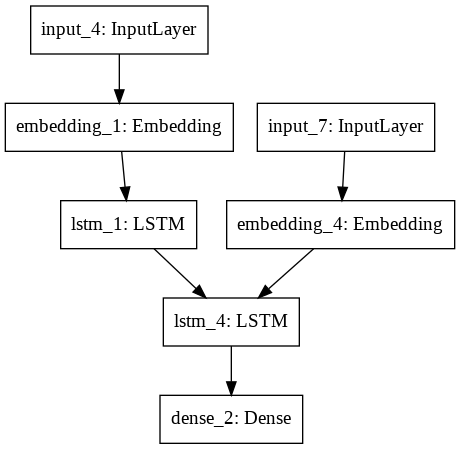

In [39]:
tf.keras.utils.plot_model(model)

In [40]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['acc'])

## fit

In [42]:
type(index_inputs) , type(index_outputs) , type(index_targets)
model.fit(x=[index_inputs,index_outputs],y=index_targets,batch_size=128,epochs=50)




Epoch 1/50
1/1 [==============================] - 5s 5s/step - loss: 4.7121 - acc: 0.0000e+00
Epoch 2/50
1/1 [==============================] - 0s 39ms/step - loss: 4.6933 - acc: 0.0000e+00
Epoch 3/50
1/1 [==============================] - 0s 38ms/step - loss: 4.6740 - acc: 0.2500
Epoch 4/50
1/1 [==============================] - 0s 33ms/step - loss: 4.6537 - acc: 0.8180
Epoch 5/50
1/1 [==============================] - 0s 33ms/step - loss: 4.6316 - acc: 0.8180
Epoch 6/50
1/1 [==============================] - 0s 35ms/step - loss: 4.6071 - acc: 0.8180
Epoch 7/50
1/1 [==============================] - 0s 36ms/step - loss: 4.5796 - acc: 0.8180
Epoch 8/50
1/1 [==============================] - 0s 40ms/step - loss: 4.5478 - acc: 0.8180
Epoch 9/50
1/1 [==============================] - 0s 35ms/step - loss: 4.5105 - acc: 0.8180
Epoch 10/50
1/1 [==============================] - 0s 35ms/step - loss: 4.4658 - acc: 0.8180
Epoch 11/50
1/1 [==============================] - 0s 35ms/step - loss: 4

## refer : https://github.com/NLP-kr/tensorflow-ml-nlp-tf2/blob/master/6.CHATBOT/6.4.seq2seq.ipynb